

# Project: Investigating NICS background checks with FBI Gun Data
# 


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#Research Question 1">Research Question 1 : What census data is most associated with high gun per capita?</a></li>
<li><a href="#Research Question 2">Research Questinon 2: Which states have had the highest growth in gun registrations?</a></li>
<li><a href="#Research Question 3">Research Question 3: What is the overall trend of gun purchases?</a></li>    
<li><a href="#conclusions">Conclusions</a></li>
    
    
</ul>

<a id='intro'></a>
## Introduction

> The data that is used in this project is retrieved from the FBI's National Instant Criminal Background Check System. The goal of this project is invesitigating NICS background checks to identify data trends of US gun purchases and creating visualisations using Python,NumPy, Pandas and Matplotlib.

> The NICS bankground check is used by to determine whether a prospective buyer is eligible to buy firms or explosives. Gun shops call into this system to ensure that each customer does not have a criminal record or isn’t otherwise ineligible to make a purchase. The data has been supplemented with state level data from census.gov.

In [1]:
# Use this cell to set up import statements for all of the packages that you
import pandas as pd
import numpy as np
import datetime
from statistics import mode
import seaborn as sns
% matplotlib inline
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')





<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
#read from CSV file
census = pd.read_csv('U.S. Census Data.csv')
#read from excel data format file 
gun = pd.read_excel('gun_data.xlsx')





In [3]:
gun.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [4]:
gun.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


In [5]:
#run census data
census.head()


,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [6]:
census.describe()


,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,80,28,65,65,65,65,65,65,65,65,...,65,65,65,65,65,65,65,65,65,65
unique,80,15,65,64,64,64,63,64,63,64,...,65,64,64,64,63,65,65,64,65,64
top,"Nonminority-owned firms, 2012",(c),"50,645.33",7.30%,50.30%,50.90%,6.80%,3.30%,0.10%,51.60%,...,75811,0.048,50.40%,2.50%,1.90%,9.10%,"7,288,000",1.50%,"40,507",7.10%
freq,1,6,1,2,2,2,2,2,2,2,...,1,2,2,2,2,1,1,2,1,2


<a id='Cleaning'></a>
## Data Cleaning
Gun datasets:


In [7]:
gun.head()


,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [8]:
gun.dtypes

month                         object
state                         object
permit                       float64
permit_recheck               float64
handgun                      float64
long_gun                     float64
other                        float64
multiple                       int64
admin                        float64
prepawn_handgun              float64
prepawn_long_gun             float64
prepawn_other                float64
redemption_handgun           float64
redemption_long_gun          float64
redemption_other             float64
returned_handgun             float64
returned_long_gun            float64
returned_other               float64
rentals_handgun              float64
rentals_long_gun             float64
private_sale_handgun         float64
private_sale_long_gun        float64
private_sale_other           float64
return_to_seller_handgun     float64
return_to_seller_long_gun    float64
return_to_seller_other       float64
totals                         int64
d

In [9]:
gun.count()

month                        12485
state                        12485
permit                       12461
permit_recheck                1100
handgun                      12465
long_gun                     12466
other                         5500
multiple                     12485
admin                        12462
prepawn_handgun              10542
prepawn_long_gun             10540
prepawn_other                 5115
redemption_handgun           10545
redemption_long_gun          10544
redemption_other              5115
returned_handgun              2200
returned_long_gun             2145
returned_other                1815
rentals_handgun                990
rentals_long_gun               825
private_sale_handgun          2750
private_sale_long_gun         2750
private_sale_other            2750
return_to_seller_handgun      2475
return_to_seller_long_gun     2750
return_to_seller_other        2255
totals                       12485
dtype: int64

In [10]:
census.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [11]:
#Replacing the NaN results as "No Records"
gun.fillna('No record', inplace = True)
gun.isnull().any()





month                        False
state                        False
permit                       False
permit_recheck               False
handgun                      False
long_gun                     False
other                        False
multiple                     False
admin                        False
prepawn_handgun              False
prepawn_long_gun             False
prepawn_other                False
redemption_handgun           False
redemption_long_gun          False
redemption_other             False
returned_handgun             False
returned_long_gun            False
returned_other               False
rentals_handgun              False
rentals_long_gun             False
private_sale_handgun         False
private_sale_long_gun        False
private_sale_other           False
return_to_seller_handgun     False
return_to_seller_long_gun    False
return_to_seller_other       False
totals                       False
dtype: bool

In [12]:
census.dtypes

Fact              object
Fact Note         object
Alabama           object
Alaska            object
Arizona           object
Arkansas          object
California        object
Colorado          object
Connecticut       object
Delaware          object
Florida           object
Georgia           object
Hawaii            object
Idaho             object
Illinois          object
Indiana           object
Iowa              object
Kansas            object
Kentucky          object
Louisiana         object
Maine             object
Maryland          object
Massachusetts     object
Michigan          object
Minnesota         object
Mississippi       object
Missouri          object
Montana           object
Nebraska          object
Nevada            object
New Hampshire     object
New Jersey        object
New Mexico        object
New York          object
North Carolina    object
North Dakota      object
Ohio              object
Oklahoma          object
Oregon            object
Pennsylvania      object


In [13]:
index_census_state = census.iloc[0].index
index_census_state

Index(['Fact', 'Fact Note', 'Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida',
       'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia',
       'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')

In [14]:
#As per the previous- using index 2 to remove fact and fact note.
index_census_state = index_census_state[2:]
index_census_state

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')

In [15]:
#Number of states 
len(index_census_state)

50

In [16]:
#List the number of states 
index_gun_state = gun.groupby('state').sum().index
index_gun_state

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia',
       'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Mariana Islands', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri',
       'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey',
       'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio',
       'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virgin Islands', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming'],
      dtype='object', name='state')

In [17]:
len(index_gun_state) #Number of states have changed from 50 to 55

55

In [18]:
#To identify why the number of states had changed from 50 to 55
for state in index_gun_state:
    if state not in index_census_state:
        print(state)
             
        

District of Columbia
Guam
Mariana Islands
Puerto Rico
Virgin Islands


In [19]:
#Extracting the Year and months column which wil print off an array 
gun['year']=gun['month'].apply(lambda x: x.split("-")[0]).astype(int)
gun['year'].unique()

array([2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007,
       2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998])

In [20]:
#
gun['months'] = gun['month'].apply(lambda x: x.split("-")[1]).astype(int)
gun['months'].unique()

array([ 9,  8,  7,  6,  5,  4,  3,  2,  1, 12, 11, 10])

In [21]:
#check the gun
gun.head(9)


,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,year,months
0,2017-09,Alabama,16717,0,5734,6320,221,317,0,15,...,0,9,16,3,0,0,3,32019,2017,9
1,2017-09,Alaska,209,2,2320,2930,219,160,0,5,...,0,17,24,1,0,0,0,6303,2017,9
2,2017-09,Arizona,5069,382,11063,7946,920,631,0,13,...,0,38,12,2,0,0,0,28394,2017,9
3,2017-09,Arkansas,2935,632,4347,6063,165,366,51,12,...,0,13,23,0,0,2,1,17747,2017,9
4,2017-09,California,57839,0,37165,24581,2984,0,0,0,...,0,0,0,0,0,0,0,123506,2017,9
5,2017-09,Colorado,4356,0,15751,13448,1007,1062,0,0,...,0,0,0,0,0,0,0,35873,2017,9
6,2017-09,Connecticut,4343,673,4834,1993,274,0,0,0,...,0,0,0,0,0,0,0,12117,2017,9
7,2017-09,Delaware,275,0,1414,1538,66,68,0,0,...,0,55,34,3,1,2,0,3502,2017,9
8,2017-09,District of Columbia,1,0,56,4,0,0,0,0,...,0,0,0,0,0,0,0,61,2017,9


In [22]:
#Assig n column names to the list
cols = ['permit', 'permit_recheck', 'handgun','long_gun','other','admin','prepawn_handgun','prepawn_long_gun',            
'prepawn_other','redemption_handgun', 'redemption_long_gun','redemption_other','returned_handgun','returned_long_gun' ,          
'returned_other','rentals_handgun', 'rentals_long_gun', 'private_sale_handgun' , 'private_sale_long_gun',        
'private_sale_other', 'return_to_seller_handgun',  'return_to_seller_long_gun','return_to_seller_other']

In [23]:
gun.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 29 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12485 non-null object
permit_recheck               12485 non-null object
handgun                      12485 non-null object
long_gun                     12485 non-null object
other                        12485 non-null object
multiple                     12485 non-null int64
admin                        12485 non-null object
prepawn_handgun              12485 non-null object
prepawn_long_gun             12485 non-null object
prepawn_other                12485 non-null object
redemption_handgun           12485 non-null object
redemption_long_gun          12485 non-null object
redemption_other             12485 non-null object
returned_handgun             12485 non-null object
returned_long_gun            12485 non-null object
returned_other           

<a id='Exploratory Data Analysis'></a>
## Exploartory Data Analysis

Research Question 1 : What census data is most associated with high gun per capita?

Research Questinon 2: Which states have had the highest growth in gun registrations?

Research Question 3: What is the overall trend of gun purchases?



<a id='Q1'></a>
## Research Question 1 : What census data is most associated with high gun per capita?






In [24]:
#group by state and gun 
gun_state = gun.groupby('state')



In [25]:
#sum the total guns in state
gun_state_sum = gun_state.sum()



In [26]:
#gun state total
gun_state_total = gun_state_sum['totals'] 



In [27]:
#gun total by state
gun_state_total.head()




state
Alabama        6706079
Alaska         1137643
Arizona        4425714
Arkansas       3752633
California    19014063
Name: totals, dtype: int64

Text(0.5,0,'')

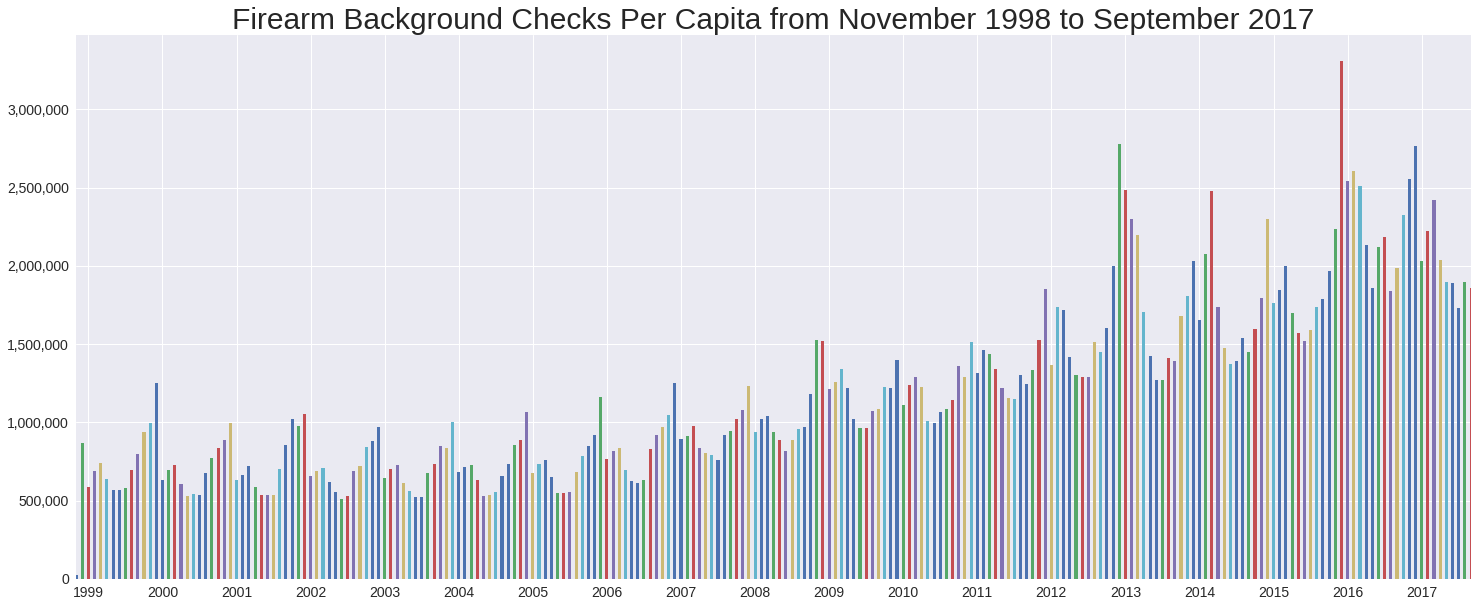

In [28]:
# sum total increasing by month from Nov 1998 to Sept 2017 
totals = gun.groupby("month")["totals"].sum()

tick_placement = pd.np.arange(2, len(totals), 12)
plt.style.use('seaborn')
ax = totals.plot(kind='bar',figsize=(25,10))
ax.set_title("Firearm Background Checks Per Capita from November 1998 to September 2017", fontsize=30)
ax.set_yticklabels([ "{0:,.0f}".format(y) for y in ax.get_yticks() ], fontsize=14);
plt.setp(ax.get_xticklabels(), rotation=0, fontsize=14)
ax.set_xticks(tick_placement)
ax.set_xticklabels([ totals.index[i].split("-")[0] for i in tick_placement ])
ax.set_xlim(0, len(totals) - 1)
ax.set_xlabel("")








Text(0.5,0,'')

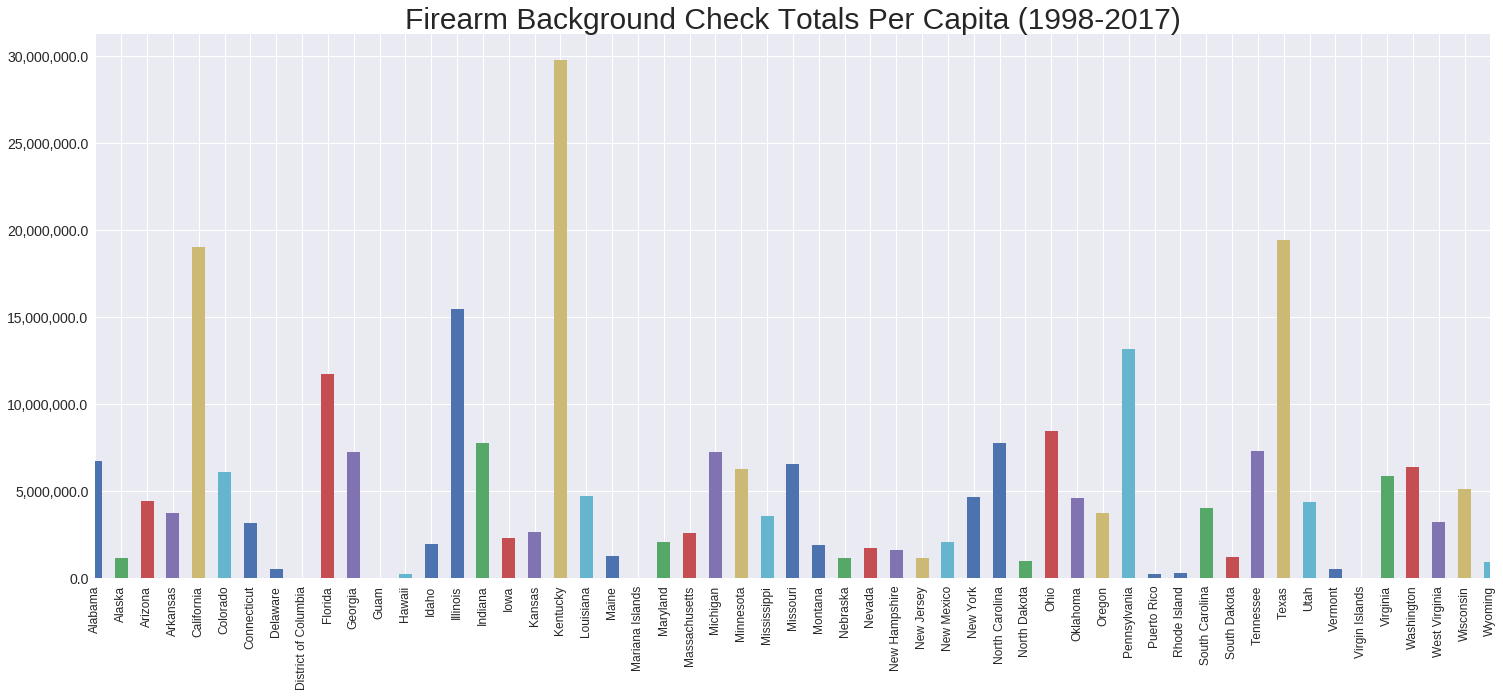

In [29]:
# Check the total of each state by month and the group by and sum
checks_by_state = gun.groupby(['state', 'month'])['totals'].sum().reset_index()
state_totals = checks_by_state.groupby('state')['totals'].sum()
state_total_tick_placement = pd.np.arange(len(state_totals))
plt.style.use('seaborn')
state_ax = state_totals.plot(kind='bar',figsize=(25,10))
state_ax.set_title("Firearm Background Check Totals Per Capita (1998-2017)", fontsize=30)
state_ax.set_yticklabels([ "{0:,.1f}".format(y) for y in state_ax.get_yticks() ], fontsize=14);
plt.setp(state_ax.get_xticklabels(), fontsize=12)
state_ax.set_xticks(state_total_tick_placement)
state_ax.set_xticklabels(state_totals.index)
state_ax.set_xlim(0, len(state_totals) - 1)
state_ax.set_xlabel("")



<a id='ResearchQ2'></a>
## Research Question 2: Which states have had the highest growth in gun registrations?





In [30]:
#group by state 
gun_alltime = gun.groupby(['month', 'state'])['totals'].sum()





In [31]:
#check registration date
cur_date = gun['month'].max()
year_date = gun['month'].min()






In [32]:
# The amount of registed guns 
gun_grow_tot = gun_alltime.loc[cur_date] - gun_alltime.loc[year_date]
gun_grow_tot.idxmax()



'Kentucky'

In [33]:
#The total amount in Kentucky
gun_grow_tot.loc['Kentucky']



397866

<a id='ReasearchQ3'></a>
## Research Question 3: What is the overall trend of gun purchases?



Text(0.5,0,'')

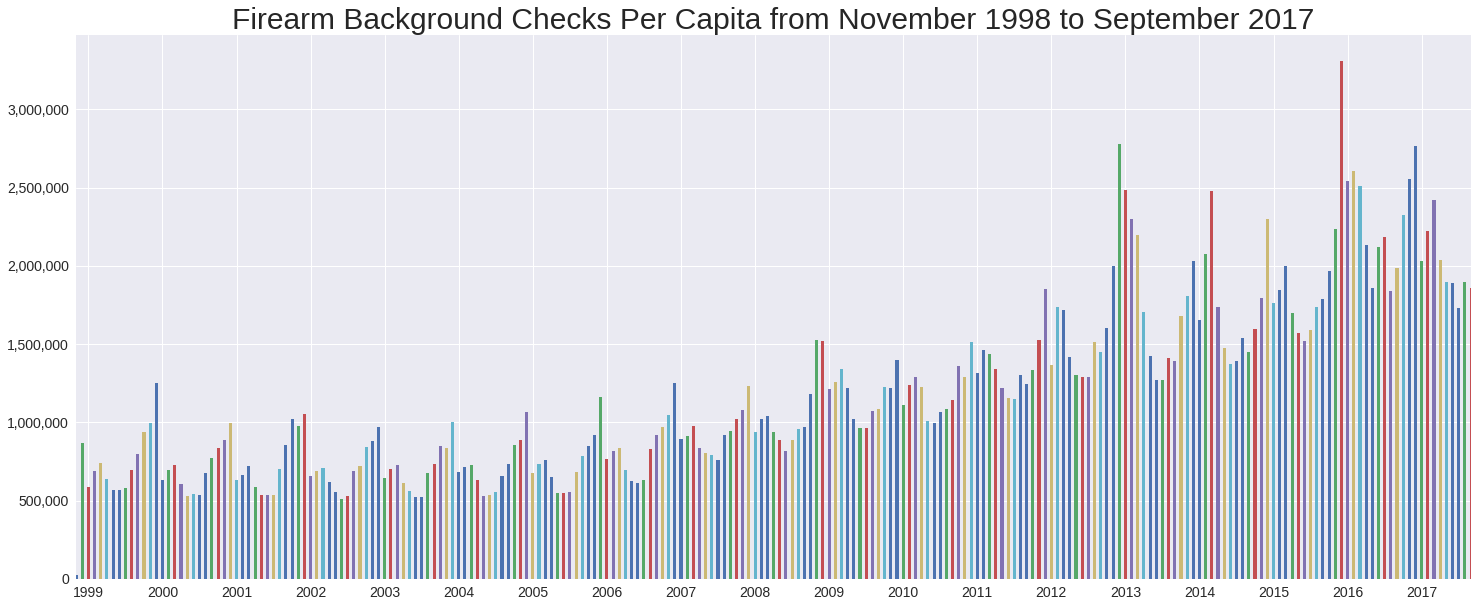

In [34]:
# sum total increasing by month from Nov 1998 to Sept 2017 
totals = gun.groupby("month")["totals"].sum()
tick_placement = pd.np.arange(2, len(totals), 12)
plt.style.use('seaborn')
ax = totals.plot(kind='bar',figsize=(25,10))
ax.set_title("Firearm Background Checks Per Capita from November 1998 to September 2017", fontsize=30)
ax.set_yticklabels([ "{0:,.0f}".format(y) for y in ax.get_yticks() ], fontsize=14);
plt.setp(ax.get_xticklabels(), rotation=0, fontsize=14)
ax.set_xticks(tick_placement)
ax.set_xticklabels([ totals.index[i].split("-")[0] for i in tick_placement ])
ax.set_xlim(0, len(totals) - 1)
ax.set_xlabel("")




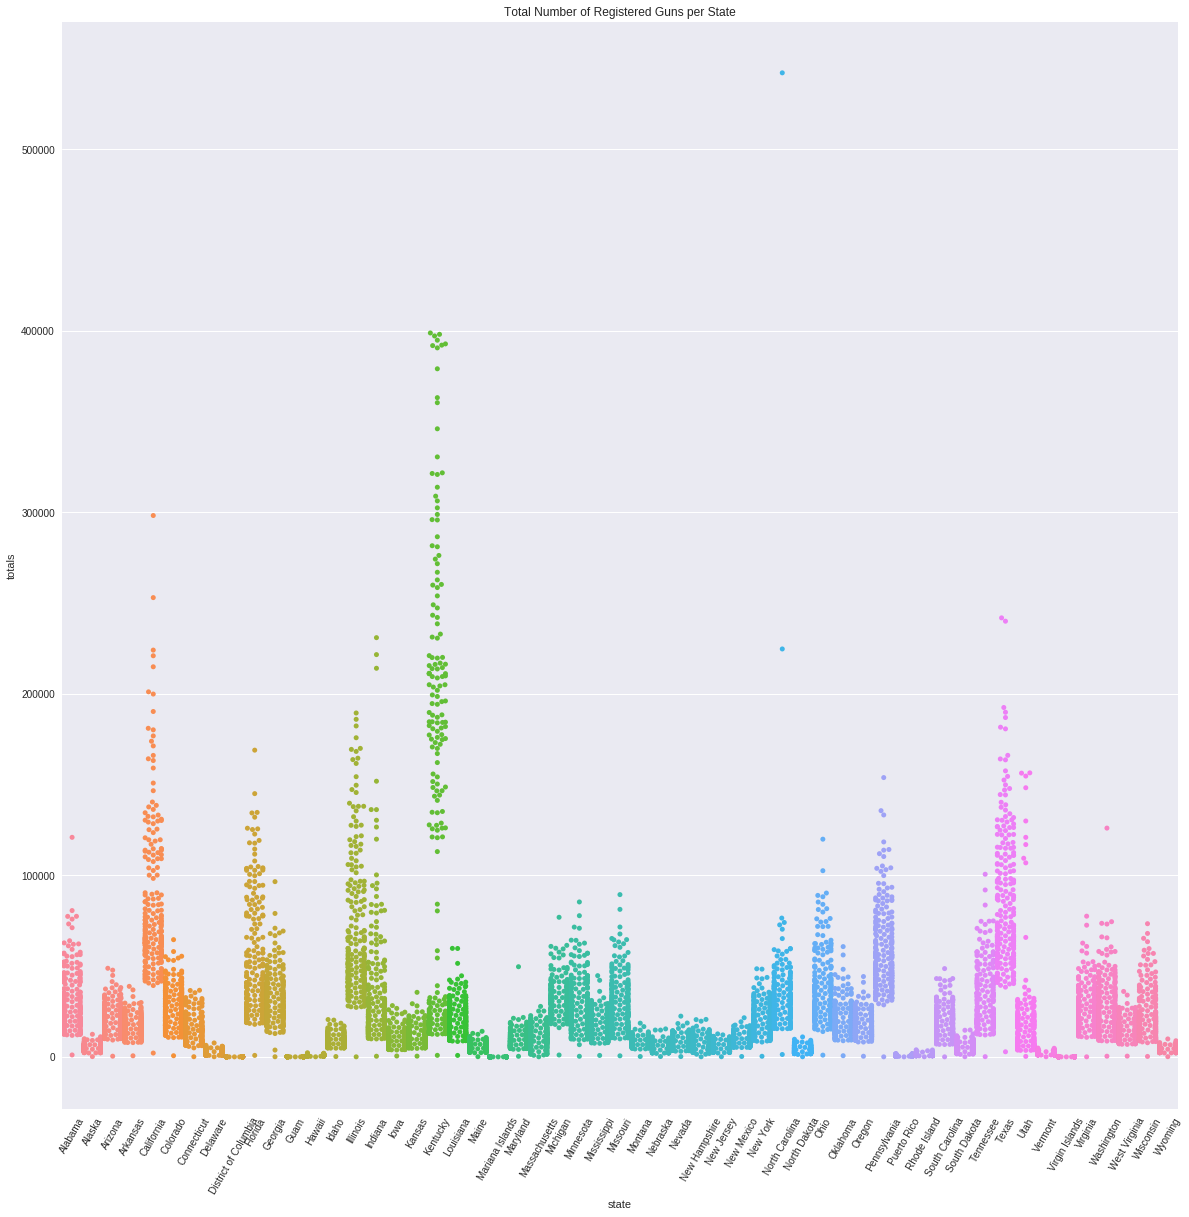

In [37]:
#The increasing number of registered guns in each state. With Kentucky with the most registered number of guns and increasing. 
plt.subplots(figsize=(20,20))
plt.xticks(rotation=60);
plt.title('Total Number of Registered Guns per State')
sns.swarmplot(x='state', y='totals', data=gun);



<a id='conclusions'></a>
## Findings 

1. The dataset was from November 1998 through to September 2017 found that Kentucky has had the most activity in background checks for guns since Novmeber 1998 righ through to September 2017.
2. Through analysis, the state of kentucky had the highest growth in gun registration. The total registed number of guns was 397866.
3. As per the swarm plot diagram above, you can see that the sum of registered guns in each state with Kentucky with the increasing amount of registered guns. 
4. As per the last swarm plot diagram, you can see the increasing number of registered guns in each state. With Kentucky with the most registered number of guns and increasing. 
5. Kentucky, Califronia and Texas had the most registered guns per capita. 



## Conclusion

    In this project,the gun dataset that was supplied had data from the time period of 1998-2017. According to Wikipedia, Gun laws in Kentucky are the least restrictive and the state doesn't require a permit in order to purchase a firearm. When looking at question 1: What census data is most associated with high gun per capita? 378384 of permits were from Kentucy in 2017.The total registred number of guns in Kentucky at 397866. The project data analysis gave me an insight of data trends of registered guns in United States of America. 
  
  
## Limiations

There were some limitations in this study, due to figuring out the calculating the total number of gun purchasing sales
in this project. However, there is an increase over time of you can see the data trends from November 1998 through to September 2017 with Firearm Background Checks Per Capita from November 1998 to September 2017. According to the Guardian (2017) only one in five Americans obtain guns without background checks. 

According to NICS statistics (2018) showed there were 25,235,215 background checks in 2017. Since 1998, there have been more than 230 million background checks, leading to more than 1.3 million denials.


## References


- Investigate a Dataset - Data Set Options: https://video.udacity-data.com/topher/2018/July/5b57919a_data-set-options/data-set-options.pdf
- GitHub support - https://github.com/Alicelibinguo/Investigate-FBI-Gun-Data
- Stackoverflow help - https://stackoverflow.com/questions/42406233/how-to-add-title-to-seaborn-boxplot
- Adding Title - https://python-graph-gallery.com/4-add-title-and-axis-label/
- Just one in five Americans obtains gun without background check, survey finds:  https://www.theguardian.com/us-news/2017/jan/02/guns-state-background-checks-study
- FBI Gun Data(2018) https://github.com/leicao-me/data-analysis-on-FBI-GUN-DATA
- Wikipeda Permits: https://en.wikipedia.org/wiki/Gun_laws_in_Kentucky 
- https://github.com/BuzzFeedNews/nics-firearm-background-checks/blob/master/README.md
- How Many Guns Were Sold In The US In 2017 And 2018?https://www.ibtimes.com/how-many-guns-were-sold-us-2017-2018-2731175


